- ### __Student Name__: Aysegul Dahi
- ### __Student ID__: 300387536
- ### __Project Name__: Machine Learning Insights into Canadian Unemployment: Analyzing the Pandemic's Impact and Predicting Future Trends (2025–2030)

## Load the Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor

## Read the Data

In [5]:
df = pd.read_csv("dataset/unemployment.csv")
df.info
df.head()

,REF_DATE,GEO,DGUID,Labour force characteristics,Educational attainment,Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2018,Canada,2016A000011124,Unemployment rate,0 to 8 years,Males,15 to 24 years,Percentage,242,units,0,v2583355,1.8.2.2.2,20.9,NaN,NaN,NaN,1
1,2019,Canada,2016A000011124,Unemployment rate,0 to 8 years,Males,15 to 24 years,Percentage,242,units,0,v2583355,1.8.2.2.2,15.3,NaN,NaN,NaN,1
2,2020,Canada,2016A000011124,Unemployment rate,0 to 8 years,Males,15 to 24 years,Percentage,242,units,0,v2583355,1.8.2.2.2,22.9,NaN,NaN,NaN,1
3,2021,Canada,2016A000011124,Unemployment rate,0 to 8 years,Males,15 to 24 years,Percentage,242,units,0,v2583355,1.8.2.2.2,16.8,NaN,NaN,NaN,1
4,2022,Canada,2016A000011124,Unemployment rate,0 to 8 years,Males,15 to 24 years,Percentage,242,units,0,v2583355,1.8.2.2.2,16.6,NaN,NaN,NaN,1


## Drop Unnecassary Columns

In [7]:
df.drop(columns=['DGUID', 'GEO','UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE','STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'], inplace=True)

In [8]:
df.columns

Index(['REF_DATE', 'Labour force characteristics', 'Educational attainment',
       'Sex', 'Age group', 'VALUE'],
      dtype='object')

In [9]:
df.rename(columns={'REF_DATE': 'year'}, inplace=True)

print(df.head())

   year Labour force characteristics Educational attainment    Sex  \
0  2018            Unemployment rate          0 to 8  years  Males   
1  2019            Unemployment rate          0 to 8  years  Males   
2  2020            Unemployment rate          0 to 8  years  Males   
3  2021            Unemployment rate          0 to 8  years  Males   
4  2022            Unemployment rate          0 to 8  years  Males   

        Age group  VALUE  
0  15 to 24 years   20.9  
1  15 to 24 years   15.3  
2  15 to 24 years   22.9  
3  15 to 24 years   16.8  
4  15 to 24 years   16.6  


In [10]:
print(df.shape)

(504, 6)


In [11]:
df.drop(columns=['Labour force characteristics'],axis=1, inplace=True)

In [12]:
df.columns

Index(['year', 'Educational attainment', 'Sex', 'Age group', 'VALUE'], dtype='object')

In [13]:
df.rename(columns={'VALUE': 'unemployment_rate', 'Educational attainment':'educational_level'}, inplace=True)

print(df.head())

   year educational_level    Sex       Age group  unemployment_rate
0  2018     0 to 8  years  Males  15 to 24 years               20.9
1  2019     0 to 8  years  Males  15 to 24 years               15.3
2  2020     0 to 8  years  Males  15 to 24 years               22.9
3  2021     0 to 8  years  Males  15 to 24 years               16.8
4  2022     0 to 8  years  Males  15 to 24 years               16.6


### Check for the Null Values

In [15]:
null_values = df.isnull().sum()
print(null_values)

year                 0
educational_level    0
Sex                  0
Age group            0
unemployment_rate    0
dtype: int64


### Get Dummies

In [17]:
df_cleaned = pd.get_dummies(df, columns=None, drop_first=False, prefix=None)

In [18]:
print(df_cleaned.info)

<bound method DataFrame.info of      year  unemployment_rate  educational_level_0 to 8  years  \
0    2018               20.9                             True   
1    2019               15.3                             True   
2    2020               22.9                             True   
3    2021               16.8                             True   
4    2022               16.6                             True   
..    ...                ...                              ...   
499  2019                3.9                            False   
500  2020                6.5                            False   
501  2021                6.6                            False   
502  2022                3.7                            False   
503  2023                4.0                            False   

     educational_level_High school graduate  \
0                                     False   
1                                     False   
2                                     False   

In [19]:
df_cleaned = df_cleaned.astype({col: 'int' for col in df_cleaned.select_dtypes(include='bool').columns})


In [20]:
print(df_cleaned.head())
print(df_cleaned.info())

   year  unemployment_rate  educational_level_0 to 8  years  \
0  2018               20.9                                1   
1  2019               15.3                                1   
2  2020               22.9                                1   
3  2021               16.8                                1   
4  2022               16.6                                1   

   educational_level_High school graduate  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   educational_level_Postsecondary certificate or diploma  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                            

In [21]:
df_cleaned.columns = df_cleaned.columns.str.lower().str.replace(" ", "_")
df_cleaned.columns

Index(['year', 'unemployment_rate', 'educational_level_0_to_8__years',
       'educational_level_high_school_graduate',
       'educational_level_postsecondary_certificate_or_diploma',
       'educational_level_some_high_school',
       'educational_level_some_postsecondary',
       'educational_level_university_degree', 'sex_females', 'sex_males',
       'age_group_15_to_24_years', 'age_group_25_to_44_years',
       'age_group_25_to_54_years', 'age_group_25_years_and_over',
       'age_group_45_years_and_over', 'age_group_55_to_64_years',
       'age_group_55_years_and_over'],
      dtype='object')

In [22]:
df_cleaned.columns = df_cleaned.columns.str.lower().str.replace("__", "_")
df_cleaned.columns

Index(['year', 'unemployment_rate', 'educational_level_0_to_8_years',
       'educational_level_high_school_graduate',
       'educational_level_postsecondary_certificate_or_diploma',
       'educational_level_some_high_school',
       'educational_level_some_postsecondary',
       'educational_level_university_degree', 'sex_females', 'sex_males',
       'age_group_15_to_24_years', 'age_group_25_to_44_years',
       'age_group_25_to_54_years', 'age_group_25_years_and_over',
       'age_group_45_years_and_over', 'age_group_55_to_64_years',
       'age_group_55_years_and_over'],
      dtype='object')

In [23]:
print(df_cleaned['educational_level_0_to_8_years'].unique())
print(df_cleaned['educational_level_0_to_8_years'].dtype)

[1 0]
int32


In [24]:
df_cleaned['educational_level_0_to_8_years'] = pd.to_numeric(df_cleaned['educational_level_0_to_8_years'], errors='coerce')

df_cleaned['educational_level_0_to_8_years'] = df_cleaned['educational_level_0_to_8_years'].fillna(0).astype(int)
print(df_cleaned.dtypes)

year                                                        int64
unemployment_rate                                         float64
educational_level_0_to_8_years                              int32
educational_level_high_school_graduate                      int32
educational_level_postsecondary_certificate_or_diploma      int32
educational_level_some_high_school                          int32
educational_level_some_postsecondary                        int32
educational_level_university_degree                         int32
sex_females                                                 int32
sex_males                                                   int32
age_group_15_to_24_years                                    int32
age_group_25_to_44_years                                    int32
age_group_25_to_54_years                                    int32
age_group_25_years_and_over                                 int32
age_group_45_years_and_over                                 int32
age_group_

### Add 'Pandemic Impact Feature'

In [26]:
df_cleaned['pandemic_impact'] = ((df_cleaned['year'] > 2019) & (df_cleaned['year'] <= 2021)).astype(int)
print(df_cleaned.head())

   year  unemployment_rate  educational_level_0_to_8_years  \
0  2018               20.9                               1   
1  2019               15.3                               1   
2  2020               22.9                               1   
3  2021               16.8                               1   
4  2022               16.6                               1   

   educational_level_high_school_graduate  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   educational_level_postsecondary_certificate_or_diploma  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  

- Here I added the pandemic_impact column to see the impact of the pandemic on unemployment rates and make better estimates. The year variable's importance in predicting unemployment rates might indeed reflect the impact of major events like the COVID-19 pandemic, which significantly disrupted global labor markets. Also, I added the 'pandemic_impact' variable to my model for checking if its importance surpasses the year variable.(Pandemic impact, covers the years 2020 and 2021.)

In [28]:
output_folder = 'dataset'
output_file_name = 'clean_unemployment.csv'
output_file_path = f"{output_folder}/{output_file_name}"
df_cleaned.to_csv(output_file_path, index=False)
print(f"Cleaned file saved as '{output_file_path}'.")

Cleaned file saved as 'dataset/clean_unemployment.csv'.


### Exploratory Data Analysis (EDA)

In [30]:
summary_statistics = df_cleaned.drop(columns=['year']).describe()
print(summary_statistics)

       unemployment_rate  educational_level_0_to_8_years  \
count         504.000000                      504.000000   
mean            8.063492                        0.166667   
std             3.985927                        0.373048   
min             3.400000                        0.000000   
25%             5.075000                        0.000000   
50%             7.100000                        0.000000   
75%             9.900000                        0.000000   
max            25.800000                        1.000000   

       educational_level_high_school_graduate  \
count                              504.000000   
mean                                 0.166667   
std                                  0.373048   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  0.000000   
max                                  1.000000   

       educationa

In [31]:
# Print the correlation matrix of the features
print(df_cleaned.corr())

                                                            year  \
year                                                1.000000e+00   
unemployment_rate                                  -5.584316e-02   
educational_level_0_to_8_years                      3.681889e-14   
educational_level_high_school_graduate             -5.254588e-14   
educational_level_postsecondary_certificate_or_...  2.013614e-15   
educational_level_some_high_school                 -1.008076e-13   
educational_level_some_postsecondary                2.611694e-14   
educational_level_university_degree                 8.841074e-14   
sex_females                                        -3.044026e-17   
sex_males                                           3.559962e-17   
age_group_15_to_24_years                           -5.671508e-15   
age_group_25_to_44_years                            5.767160e-15   
age_group_25_to_54_years                           -5.388421e-15   
age_group_25_years_and_over                     

In [32]:
# Select the top 10 features with the highest correlation to the unemployment_rate column
ind_heatmap = df_cleaned.corr().unemployment_rate.abs().sort_values(ascending=False)[:10].index
df_heatmap = df_cleaned[ind_heatmap]

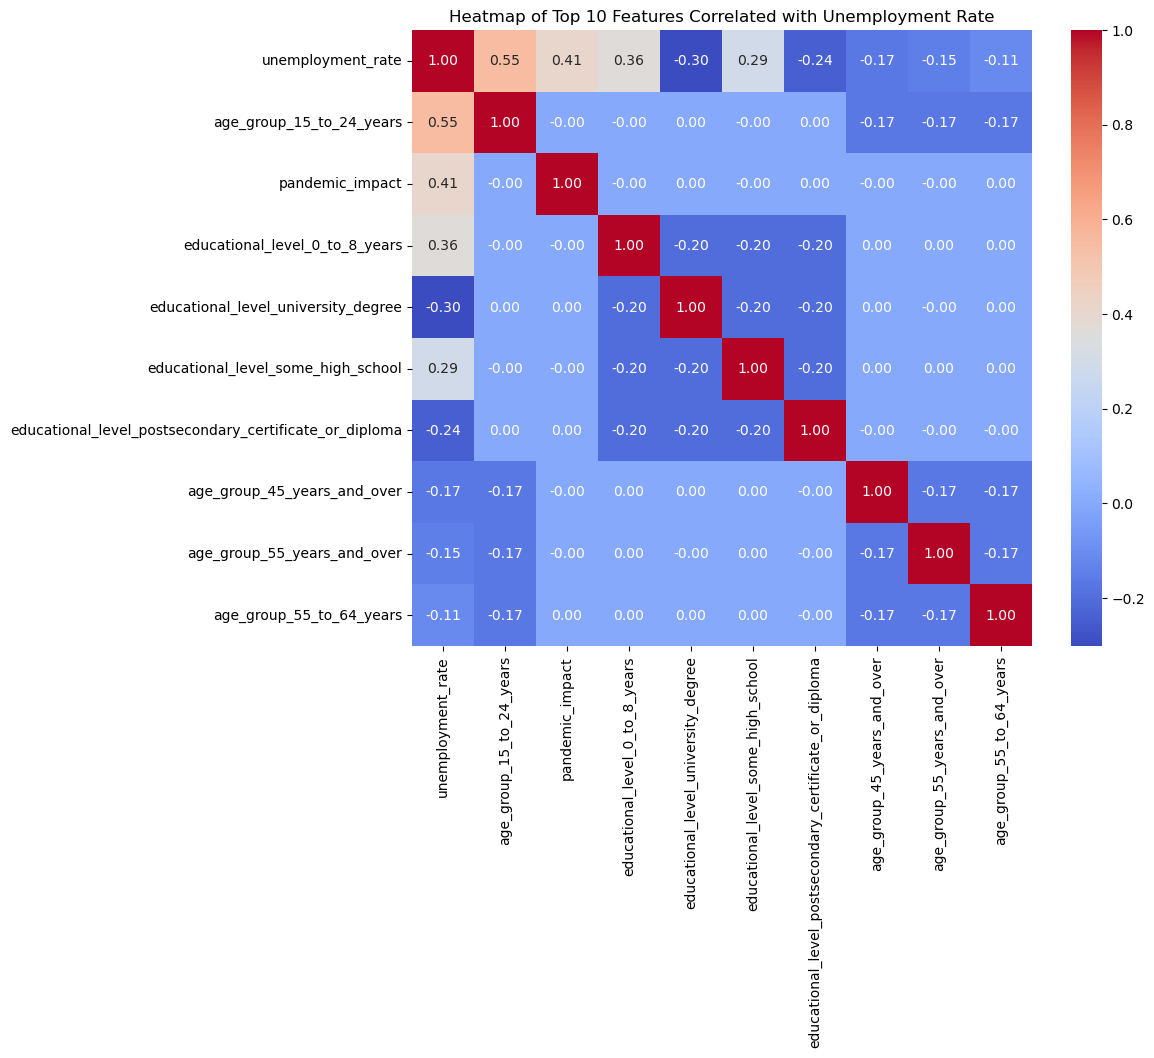

In [33]:
# Plot the heatmap for the selected features
plt.figure(figsize=(10, 8))
sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap of Top 10 Features Correlated with Unemployment Rate")
plt.show()

### Multicollinearity Analysis 

In [35]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_heatmap.drop(columns=['unemployment_rate'])

X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF data
print(vif_data)

                                             Feature       VIF
0                                              const  4.833333
1                           age_group_15_to_24_years  1.142857
2                                    pandemic_impact  1.000000
3                     educational_level_0_to_8_years  1.250000
4                educational_level_university_degree  1.250000
5                 educational_level_some_high_school  1.250000
6  educational_level_postsecondary_certificate_or...  1.250000
7                        age_group_45_years_and_over  1.142857
8                        age_group_55_years_and_over  1.142857
9                           age_group_55_to_64_years  1.142857


### Key Observations:
#### VIF Thresholds:
- A VIF of 1 suggests no multicollinearity.
- A VIF between 1 and 5 indicates moderate multicollinearity but is generally acceptable.
- A VIF greater than 5 suggests high multicollinearity, potentially problematic for regression analysis.
#### Interpretation of the Data:
- The const (intercept) has a VIF of 5.5, which is slightly above the threshold of 5, indicating potential multicollinearity issues related to the intercept term. However, the constant term doesn't represent a feature. The high VIF for const occurs because the constant is independent of all the other features, and this inflates its VIF. It's not something to be concerned about for multicollinearity analysis.
- All other variables have VIF values ranging from 1.25 to 1.29, which indicates very low multicollinearity. This is generally a good sign as these features are not highly correlated with each other.
#### Implications for Model:
- Since most of the variables have low VIF values, multicollinearity is not a major concern for these features.

### Univariate Analysis

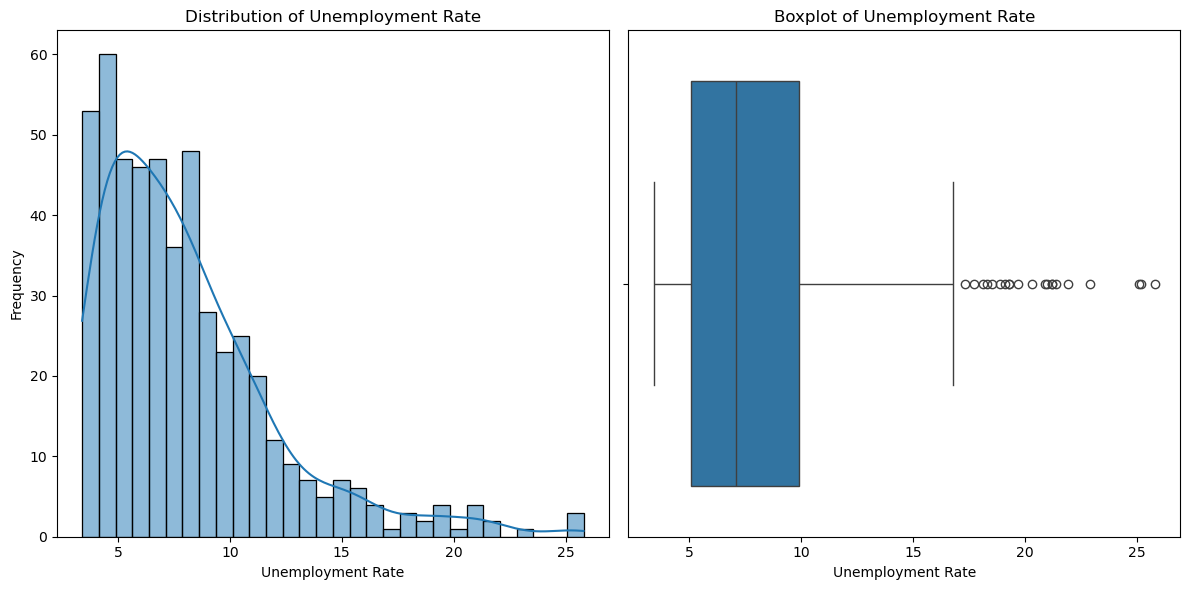

In [38]:
# Set up the figure for both plots
plt.figure(figsize=(12, 6))

# 1. Distribution Plot (Histogram)
plt.subplot(1, 2, 1)  
sns.histplot(df_cleaned['unemployment_rate'], bins=30, kde=True)
plt.title("Distribution of Unemployment Rate")
plt.xlabel("Unemployment Rate")
plt.ylabel("Frequency")

# 2. Boxplot
plt.subplot(1, 2, 2) 
sns.boxplot(x=df_cleaned['unemployment_rate'])
plt.title("Boxplot of Unemployment Rate")
plt.xlabel("Unemployment Rate")

# Display the plots
plt.tight_layout()
plt.show()

### Interpretation
### Histogram with KDE Plot 
#### Shape of Distribution:
- The distribution is skewed to the right (positively skewed), indicating that most unemployment rates are concentrated at the lower end of the range (around 5 to 10%), with fewer instances of higher unemployment rates (beyond 15%).
#### Frequency:
- The peak frequency is observed around unemployment rates of 5% to 6%, suggesting that this range is the most common among the data points.
#### Tail Behavior:
The right tail extends towards higher unemployment rates (up to ~25%), representing outliers or regions with exceptionally high unemployment.
### Boxplot 
#### Median and IQR:
- The boxplot shows the central tendency and spread of the unemployment rate.
The median (middle line of the box) is slightly below the center, suggesting that the distribution is not symmetric.
The interquartile range (IQR) represents the middle 50% of data, which falls between ~5% and ~10%.
#### Outliers:
- Data points beyond the whiskers (on the right) are considered outliers. These represent regions or instances with unusually high unemployment rates compared to the majority.
#### Range:
- The whiskers extend to the lower and upper bounds (excluding outliers), showing the range of most data points. The upper whisker ends near 15%, indicating most unemployment rates are below this value.
#### General Interpretation:
- The unemployment rate is generally low to moderate, with most data falling between 5% and 10%.
- There is a significant positive skew, with a few regions having exceptionally high unemployment rates.
Outliers in the boxplot align with the long tail observed in the histogram.

### The Unemployment Rate Trend Over the Years

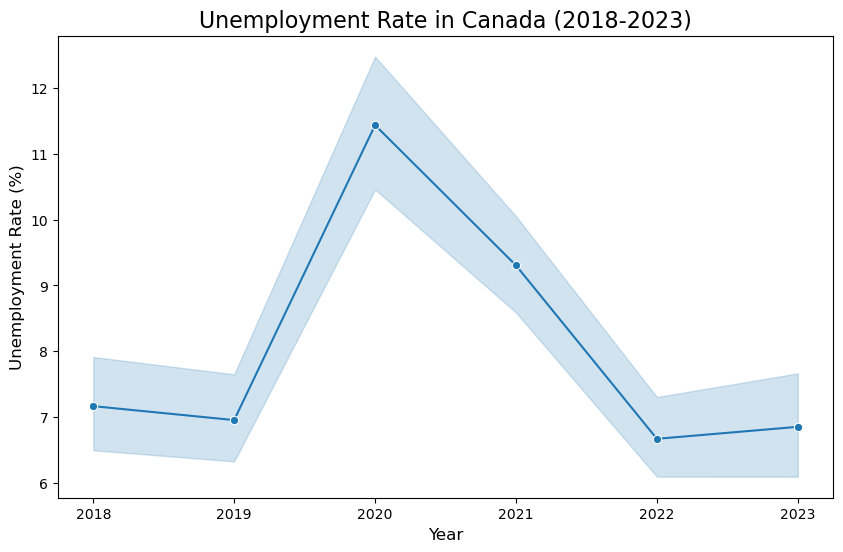

In [41]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.lineplot(data=df_cleaned, x="year", y="unemployment_rate", marker="o")
plt.title("Unemployment Rate in Canada (2018-2023)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.xticks(df_cleaned["year"].unique())
plt.show()

### Interpretation
- The unemployment rate exhibits significant variation during this period.
- There is a sharp increase in unemployment in 2020, followed by a noticeable decline in subsequent years.
#### Key Observations:
- __2018-2019:__ The unemployment rate remains relatively stable, around 7%.
- __2020:__ A significant spike in the unemployment rate, peaking above 12%. This is likely due to the economic impact of the COVID-19 pandemic.
- __2021-2023:__ A steady recovery is visible, with the unemployment rate gradually declining. By 2023, the rate stabilizes around pre-pandemic levels.
### Confidence Interval (Shaded Area):
- The shaded area around the line represents a confidence interval, providing a range of uncertainty around the unemployment rate data points. 

### Pandemic Impact on Umemployment Rate

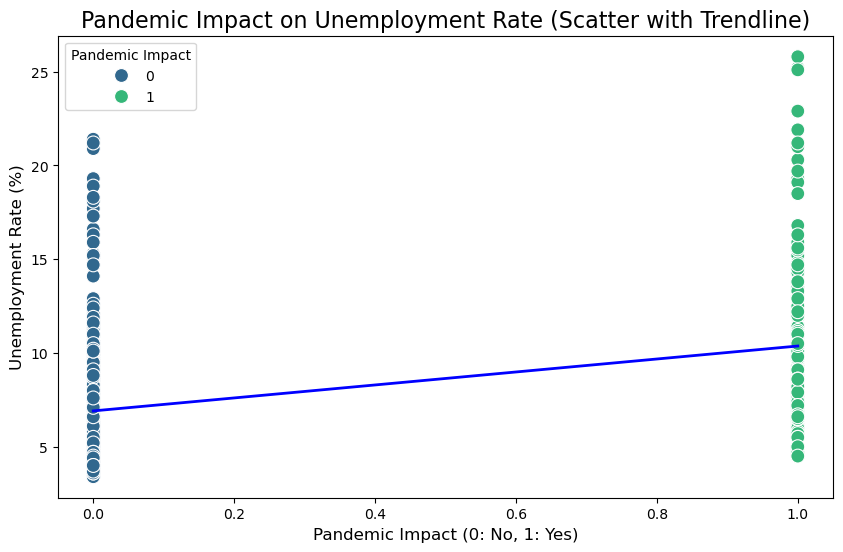

In [44]:
plt.figure(figsize=(10, 6))  
sns.scatterplot(
    data=df_cleaned, 
    x="pandemic_impact", 
    y="unemployment_rate", 
    hue="pandemic_impact", 
    palette="viridis", 
    s=100
)
sns.lineplot(
    data=df_cleaned, 
    x="pandemic_impact", 
    y="unemployment_rate", 
    color="blue", 
    errorbar=None,  # Replace ci=None with errorbar=None
    linewidth=2
)
plt.title("Pandemic Impact on Unemployment Rate (Scatter with Trendline)", fontsize=16)
plt.xlabel("Pandemic Impact (0: No, 1: Yes)", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.legend(title="Pandemic Impact")
plt.show()

### Interpretation
#### Two Distinct Clusters:
#### Pandemic Impact = 0 (Pre-Pandemic):
- Unemployment rates are generally lower and show less variation.
- Most data points are concentrated in the range of approximately 5%–10%.
#### Pandemic Impact = 1 (Pandemic Period):
- Unemployment rates are generally higher, with a wider spread.
- Data points range from 5%–25%, indicating a significant impact of the pandemic on unemployment.
#### Positive Trendline:
- The blue trendline shows a positive relationship between pandemic impact and unemployment rate.
- This suggests that unemployment rates were higher during the pandemic years (2020–2021) compared to pre-pandemic years.
#### Variation in Pandemic Period:
- There is greater variability in unemployment rates during the pandemic (Pandemic Impact = 1). This could reflect differences across industries, regions, or demographic groups affected by the pandemic.
#### Policy Implications:
- The data highlights the need for targeted interventions (e.g., job training programs, economic stimulus) to mitigate unemployment during economic crises like the pandemic.

### Unemployment Rate by Education Level

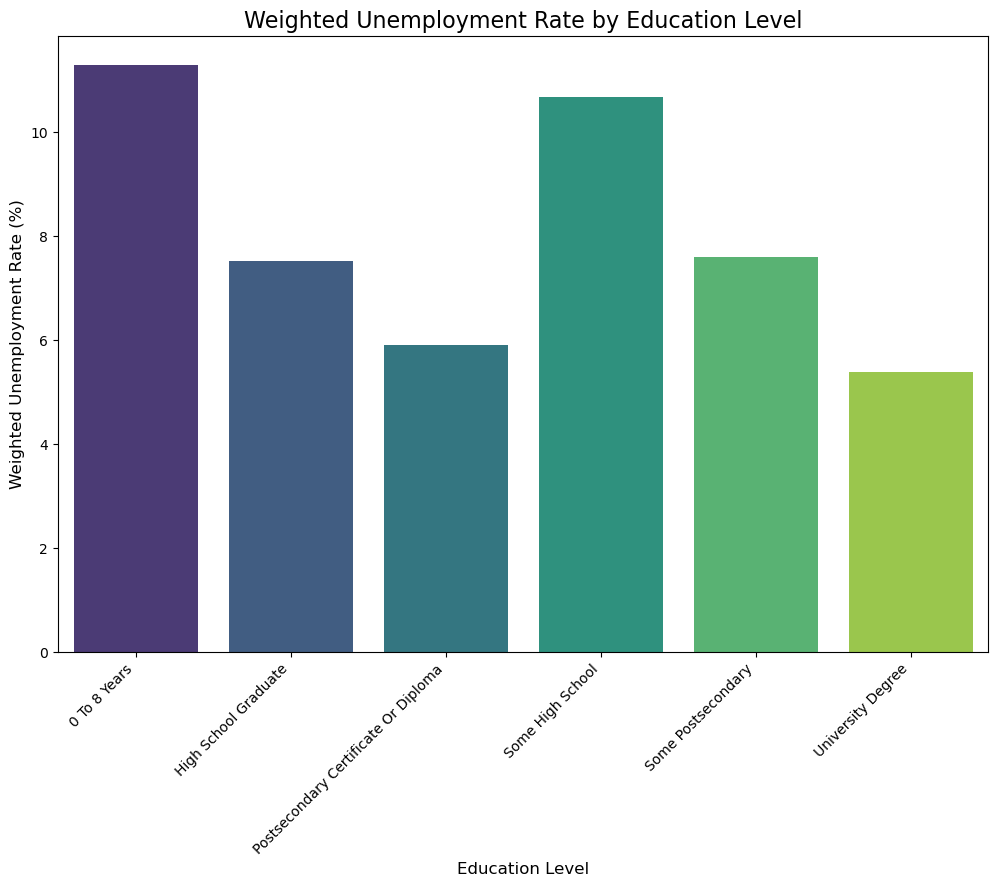

In [47]:

education_columns = [
    'educational_level_0_to_8_years',
    'educational_level_high_school_graduate',
    'educational_level_postsecondary_certificate_or_diploma',
    'educational_level_some_high_school',
    'educational_level_some_postsecondary',
    'educational_level_university_degree'
]

weighted_unemployment = {}
for column in education_columns:
    # Weighted unemployment rate = sum(unemployment_rate * binary_value) / sum(binary_value)
    total_weight = df_cleaned[column].sum()
    if total_weight > 0:
        weighted_rate = (df_cleaned['unemployment_rate'] * df_cleaned[column]).sum() / total_weight
    else:
        weighted_rate = 0  
    weighted_unemployment[column] = weighted_rate

weighted_unemployment_df = pd.DataFrame.from_dict(weighted_unemployment, orient='index', columns=['Weighted Unemployment Rate'])
weighted_unemployment_df.reset_index(inplace=True)
weighted_unemployment_df.rename(columns={'index': 'Education Level'}, inplace=True)

weighted_unemployment_df['Education Level'] = weighted_unemployment_df['Education Level'].str.replace(
    '_', ' '
).str.replace('educational level ', '').str.title()


plt.figure(figsize=(12, 8))
sns.barplot(
    data=weighted_unemployment_df,
    x="Education Level",
    y="Weighted Unemployment Rate",
    hue="Education Level",  
    dodge=False,            
    palette="viridis",      
    legend=False            
)
plt.xticks(rotation=45, ha="right")
plt.title("Weighted Unemployment Rate by Education Level", fontsize=16)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Weighted Unemployment Rate (%)", fontsize=12)
plt.show()

### Interpretation
#### Education Level "0 to 8 years":
- This group has the highest weighted unemployment rate (above 10%), indicating that individuals with the lowest level of education face the greatest challenges in securing employment.
#### Some High School:
- The second-highest unemployment rate is observed among individuals with partial high school education, which suggests that incomplete education is a significant barrier to employment.
#### Some Postsecondary and High School Graduate:
- These categories have moderate unemployment rates, indicating that completing high school or having some postsecondary education provides better opportunities compared to those with less education.
#### Postsecondary Certificate/Diploma and University Degree:
- Individuals with a university degree or a postsecondary certificate or diploma have the lowest unemployment rates, highlighting the value of higher education in improving employability.
#### General Trend:
- The graph clearly shows that as the level of education increases, the weighted unemployment rate decreases, which aligns with the common understanding that higher education often leads to better job prospects.

### Unemployment Rate By Gender

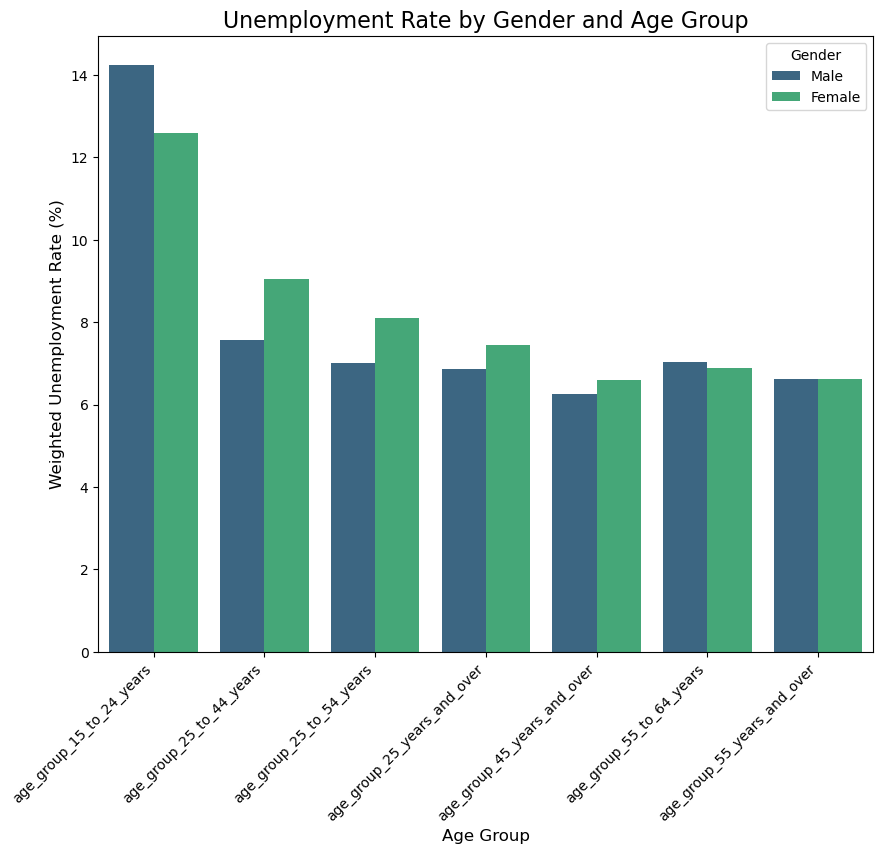

In [50]:
age_group_cols = [
    "age_group_15_to_24_years",
    "age_group_25_to_44_years",
    "age_group_25_to_54_years",
    "age_group_25_years_and_over",
    "age_group_45_years_and_over",
    "age_group_55_to_64_years",
    "age_group_55_years_and_over"
]

gender_age_melted = df_cleaned.melt(
    id_vars=["year", "unemployment_rate", "sex_females", "sex_males"],
    value_vars=age_group_cols,
    var_name="Age Group",
    value_name="Count"
)

results = []

for (age_group, sex_females), group in gender_age_melted.groupby(["Age Group", "sex_females"]):
    if group["Count"].sum() > 0:  # Ensure there's data to calculate
        weighted_unemployment_rate = (group["unemployment_rate"] * group["Count"]).sum() / group["Count"].sum()
    else:
        weighted_unemployment_rate = 0  # Handle cases with no data
    
  
    results.append({
        "Age Group": age_group,
        "Gender": "Female" if sex_females == 1 else "Male",
        "Weighted Unemployment Rate": weighted_unemployment_rate
    })


gender_age_summary = pd.DataFrame(results)

plt.figure(figsize=(10, 8))
sns.barplot(
    data=gender_age_summary,
    x="Age Group",
    y="Weighted Unemployment Rate",
    hue="Gender",
    palette="viridis"
)
plt.xticks(rotation=45, ha="right")
plt.title("Unemployment Rate by Gender and Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Weighted Unemployment Rate (%)", fontsize=12)
plt.legend(title="Gender", loc="upper right")
plt.show()

### Interpretation
#### Youth Unemployment (15-24 Years):
- This age group has the highest unemployment rates for both genders.
- Males have a slightly higher unemployment rate than females in this group.
#### Prime Working Age (25-44 Years, 25-54 Years):
- In these age groups, unemployment rates decrease significantly for both genders compared to the youth group.
- Females generally show higher unemployment rates than males, especially in the 25-44 years group.
#### Older Age Groups (45 Years and Over):
- The unemployment rates stabilize and become relatively similar between males and females in older age brackets.
- Both genders experience slightly lower unemployment rates compared to younger groups.
#### Seniors (55-64 and 55+ Years):
- Unemployment rates remain relatively stable and similar for both genders, suggesting that unemployment disparities are less pronounced in older demographics.
#### General Trend:
- Unemployment is highest among younger individuals, especially males in the 15-24 age group.
- The gap between genders is more evident in younger and prime working-age groups but narrows in older age groups.
#### Insights:
#### Policy Implication:
- Targeted interventions could focus on reducing youth unemployment, especially for males, and providing better opportunities for females in the 25-44 age range.
#### Gender Equality:
- The narrowing gap in older age groups suggests a leveling of opportunities or fewer disparities as individuals progress in their careers.

### Unemployment Rate By Gender and Year

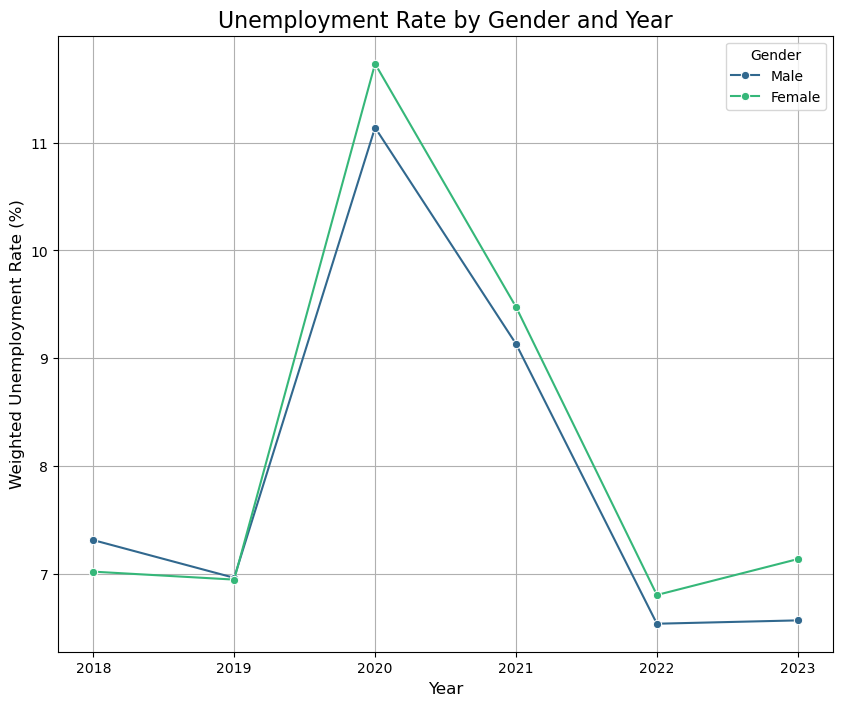

In [53]:
results = []

for (year, sex_females), group in df_cleaned.groupby(["year", "sex_females"]):
    if sex_females == 1:  # Females
        weighted_unemployment_rate = (group["unemployment_rate"] * group["sex_females"]).sum() / group["sex_females"].sum()
    else:  # Males
        weighted_unemployment_rate = (group["unemployment_rate"] * group["sex_males"]).sum() / group["sex_males"].sum()
    
    results.append({
        "Year": year,
        "Gender": "Female" if sex_females == 1 else "Male",
        "Weighted Unemployment Rate": weighted_unemployment_rate
    })

gender_year_summary = pd.DataFrame(results)

plt.figure(figsize=(10, 8))
sns.lineplot(
    data=gender_year_summary,
    x="Year",
    y="Weighted Unemployment Rate",
    hue="Gender",
    marker="o",
    palette="viridis"
)
plt.title("Unemployment Rate by Gender and Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Weighted Unemployment Rate (%)", fontsize=12)
plt.legend(title="Gender", loc="upper right")
plt.xticks(sorted(df_cleaned["year"].unique()))
plt.grid(True)
plt.show()

### Interpretation
#### 2018-2019:
- Both males and females have similar unemployment rates, hovering around 7%.
- This indicates minimal gender disparity in unemployment during these years.
#### 2020 (COVID-19 Pandemic Impact):
- There is a sharp spike in unemployment rates for both genders, with females showing a slightly higher unemployment rate than males.
- This highlights the significant impact of the pandemic on employment, with females potentially experiencing greater job losses.
#### 2021-2023 (Recovery Period):
- Unemployment rates for both genders decline sharply after 2020, reflecting recovery efforts.
- By 2023, the unemployment rates for males drop slightly below pre-pandemic levels, while females' rates stabilize close to pre-pandemic levels.
#### Gender Comparison:
#### Pandemic Impact:
- Females were more affected during the peak unemployment year (2020), which may be linked to sectors with higher female employment being hit harder.
#### Post-Pandemic Recovery:
- The recovery appears to have been slightly faster for males than for females.
#### Implications:
### Policy Focus:
Support for sectors heavily employing females during crises may help mitigate disparities.
#### Further Analysis:
- Investigating specific industries or age groups could shed light on the nuances of gender disparities in unemployment trends.

### Unemployment Rate by Age Group and Year

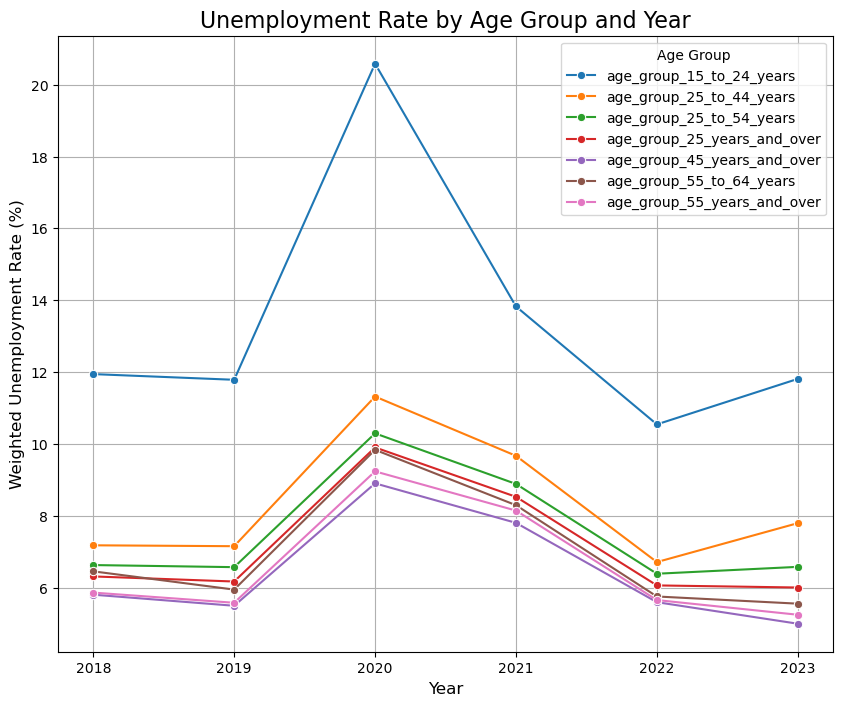

In [56]:
age_columns = [
    'age_group_15_to_24_years',
    'age_group_25_to_44_years',
    'age_group_25_to_54_years',
    'age_group_25_years_and_over',
    'age_group_45_years_and_over',
    'age_group_55_to_64_years',
    'age_group_55_years_and_over'
]

age_year_melted = df_cleaned.melt(
    id_vars=["year", "unemployment_rate"], 
    value_vars=age_columns, 
    var_name="Age Group", 
    value_name="Count"
)
results = []

for (year, age_group), group in age_year_melted.groupby(["year", "Age Group"]):
    if group["Count"].sum() > 0:
        weighted_unemployment_rate = (group["unemployment_rate"] * group["Count"]).sum() / group["Count"].sum()
    else:
        weighted_unemployment_rate = 0 
    
    results.append({
        "Year": year,
        "Age Group": age_group,
        "Weighted Unemployment Rate": weighted_unemployment_rate
    })

age_year_summary = pd.DataFrame(results)
plt.figure(figsize=(10, 8))
sns.lineplot(
    data=age_year_summary,
    x="Year",
    y="Weighted Unemployment Rate",
    hue="Age Group",
    marker="o",
    palette="tab10"
)
plt.title("Unemployment Rate by Age Group and Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Weighted Unemployment Rate (%)", fontsize=12)
plt.legend(title="Age Group", loc="upper right")
plt.xticks(sorted(df_cleaned["year"].unique()))
plt.grid(True)
plt.show()

### Interpretation

#### Youth Unemployment (Age Group 15-24 Years):
- This group consistently shows the highest unemployment rates across all years.
- There is a significant spike in 2020, where the unemployment rate exceeds 20%, likely due to the economic impact of the COVID-19 pandemic.
- Although there is a recovery after 2020, this age group remains the most vulnerable in the labor market.
#### Prime Working Ages (25-44 and 25-54 Years):
- These groups show moderate unemployment rates compared to younger individuals.
- The unemployment rate also peaks in 2020, but the increase is less dramatic compared to the 15-24 age group.
- By 2023, unemployment rates return to near pre-pandemic levels.
#### Older Age Groups (45+ Years):
- Unemployment rates are relatively stable and lower compared to younger groups.
- The impact of the pandemic (2020) is visible but less pronounced, suggesting that older individuals may have been less affected by job losses or - changes in the labor market.
#### Seniors (55+ Years):
- These groups experience the lowest unemployment rates, likely reflecting more stable employment or higher retirement rates during this period.
#### General Trends:
#### Impact of the COVID-19 Pandemic (2020):
- All age groups experience a noticeable increase in unemployment rates during 2020.
- Younger age groups (15-24 years) are disproportionately affected, with the largest spike.
#### Post-Pandemic Recovery (2021-2023):
- Across all age groups, there is a sharp decline in unemployment rates after 2020, indicating a recovery in the labor market.
#### Age-Based Vulnerability:
- The youngest age group (15-24 years) consistently shows the highest unemployment rates, highlighting their greater vulnerability in the job market.
- Older age groups (45+ years) tend to experience more stability, even during economic downturns.
#### Implications:
- Policy Recommendations:
- Focused interventions are needed to address youth unemployment, especially during economic crises.
- Programs targeting skill development and job placements for young workers could help mitigate these challenges.
#### Further Analysis:
- Investigate the types of jobs or sectors that are disproportionately affecting younger age groups.
Explore the role of education levels within these age groups to understand additional factors influencing unemployment.

### Load and Preprocess the Data

In [59]:
from Modules.pipeline_regression import preprocess_data, evaluate_models, hyperparameter_tuning, create_pipeline


In [60]:
X_train, X_test, y_train, y_test = preprocess_data(df_cleaned, target_column='unemployment_rate')

### Evaluate Different Models with Pipeline

In [62]:
results = evaluate_models(X_train, X_test, y_train, y_test)
results_df_cleaned = pd.DataFrame(results)  
print(results_df_cleaned)

               Model        MSE        R2
0  Linear Regression   2.803024  0.846906
1   Ridge Regression   2.908175  0.841163
2   Lasso Regression  10.328810  0.435866
3      Random Forest   1.526409  0.916631
4      Decision Tree   2.000594  0.890733
5                KNN   5.502653  0.699459


In [63]:
import importlib
import Modules
importlib.reload(Modules)

<module 'Modules' (namespace) from ['C:\\Users\\ayseg\\OneDrive\\Desktop\\Project_ADa536\\Project_ADa536\\Modules', 'C:\\Users\\ayseg\\OneDrive\\Desktop\\Project_ADa536\\Project_ADa536\\Modules']>

### Perform Hyperparameter Tuning with Pipelines


In [65]:
best_params = hyperparameter_tuning(X_train, y_train)

print("Best Parameters for Each Model:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")


Best Parameters for Each Model:
Ridge Regression: {'regressor__alpha': 10.0}
Lasso Regression: {'regressor__alpha': 0.01}
Random Forest: {'regressor__n_estimators': 200}
Decision Tree: {'regressor__max_depth': 10}
KNN: {'regressor__n_neighbors': 10}


### Visualize the Results

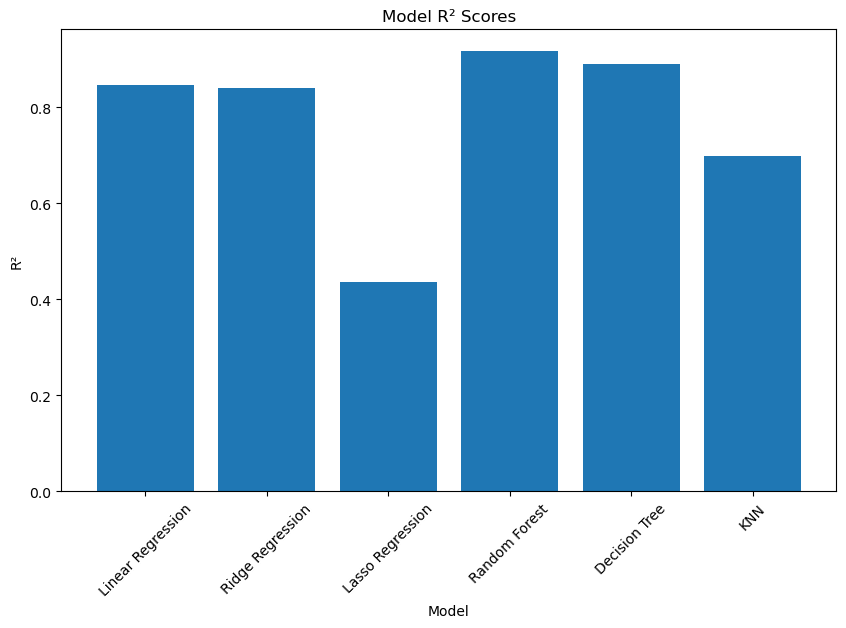

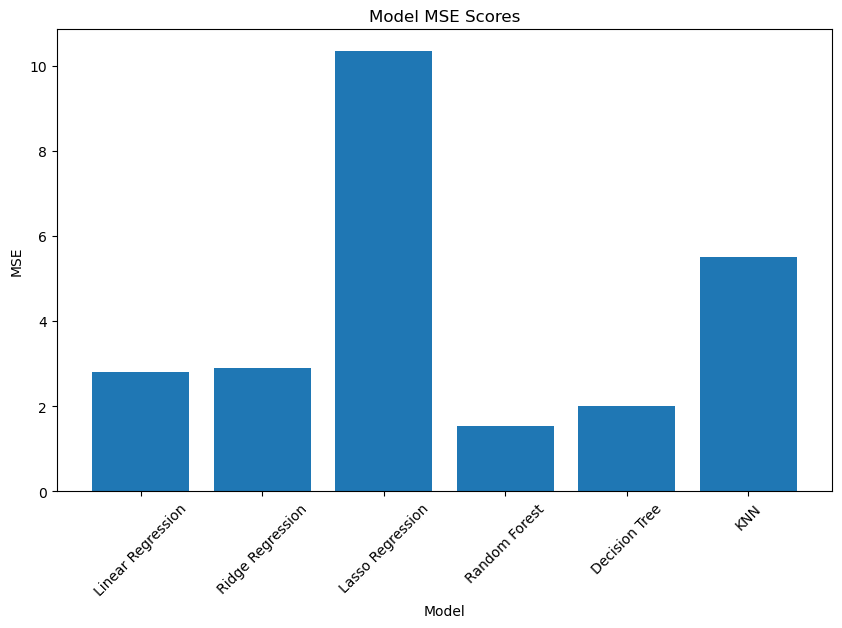

In [67]:
# Plot R² Scores
plt.figure(figsize=(10, 6))
plt.bar(results_df_cleaned['Model'], results_df_cleaned['R2'])
plt.title('Model R² Scores')
plt.ylabel('R²')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# Plot MSE
plt.figure(figsize=(10, 6))
plt.bar(results_df_cleaned['Model'], results_df_cleaned['MSE'])
plt.title('Model MSE Scores')
plt.ylabel('MSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

### Interpretation
#### Best Model:
- __The Random Forest__ model performs the best with:
- __Lowest MSE:__ 1.53.
- __Highest R²:__ 0.92.
- This indicates it explains nearly 92% of the variance in the unemployment rate.
#### Second Best Model:
- __The Decision Tree__ model shows decent performance with:
- __MSE:__  2.1.
- __R²:__ 0.89.
- However, it is not as robust as Random Forest, which aggregates multiple decision trees.
#### Linear Regression 
- __MSE:__ 2.80.
- __R²:__ 0.85.
- Linear Regression performs reasonably well, capturing the linear relationships in the data. However, it cannot model non-linearities as effectively as Random Forest or Decision Trees.
#### Ridge Regression
- __MSE:__ 2.91.
- __R²:__ 0.84.
Ridge Regression is comparable to Linear Regression. The regularization (via alpha) likely helps reduce overfitting slightly, but the non-linearity of the data limits its performance.
#### Lasso Regression
- __MSE:__ 10.33 (highest error).
- __R²:__ 0.43 (lowest explained variance).
- Lasso Regression performs poorly, likely because the high regularization (alpha) penalizes important feature coefficients excessively, leading to underfitting.
#### KNN
- __MSE:__ 5.50.
- __R²:__ 0.70.
- KNN performs moderately well but struggles to capture global patterns in the data. It's more sensitive to local data structure and heavily depends on the choice of neighbors.

### Feature Importance For Random Forest

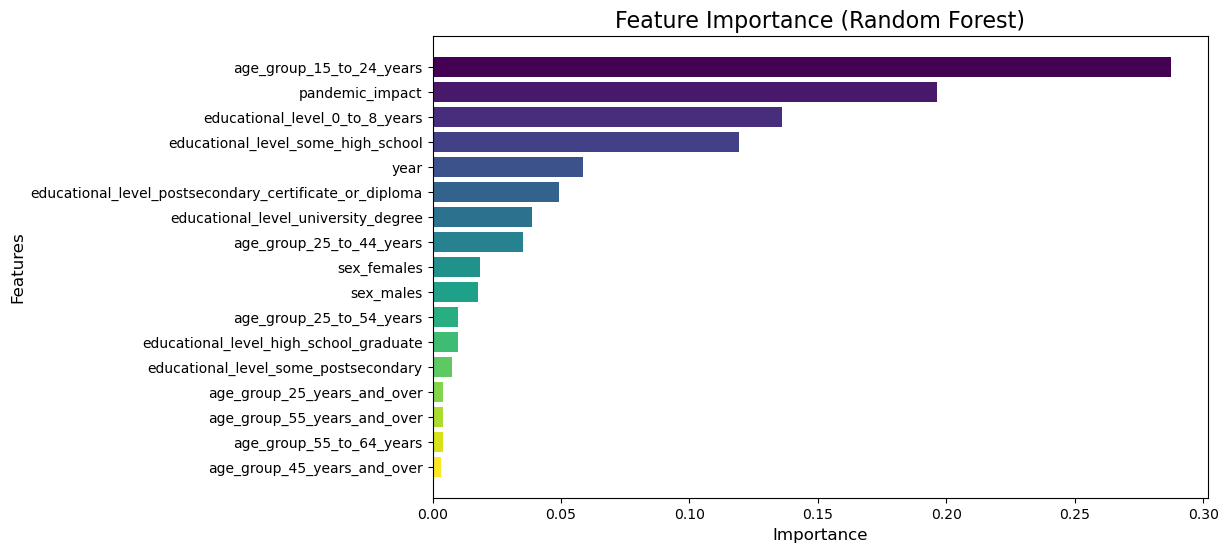

In [70]:
# Fit the best Random Forest model
best_rf = RandomForestRegressor(n_estimators=200, random_state=42)
best_rf.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

num_features = len(feature_importances)
colors = cm.viridis(np.linspace(0, 1, num_features))

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color=colors)
plt.title('Feature Importance (Random Forest)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.gca().invert_yaxis()  
plt.show()

In [71]:
feature_importances.sort_values(by='Importance', ascending=False).head(10)

,Feature,Importance
9,age_group_15_to_24_years,0.287306
16,pandemic_impact,0.196510
1,educational_level_0_to_8_years,0.136020
4,educational_level_some_high_school,0.119449
0,year,0.058739
3,educational_level_postsecondary_certificate_or...,0.049382
6,educational_level_university_degree,0.038665
10,age_group_25_to_44_years,0.035025
7,sex_females,0.018420
8,sex_males,0.017797


In [72]:
# Fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)  # Use the best parameters
rf_model.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=200, random_state=42)

In [73]:
y_pred = rf_model.predict(X_test)
residuals = y_test - y_pred

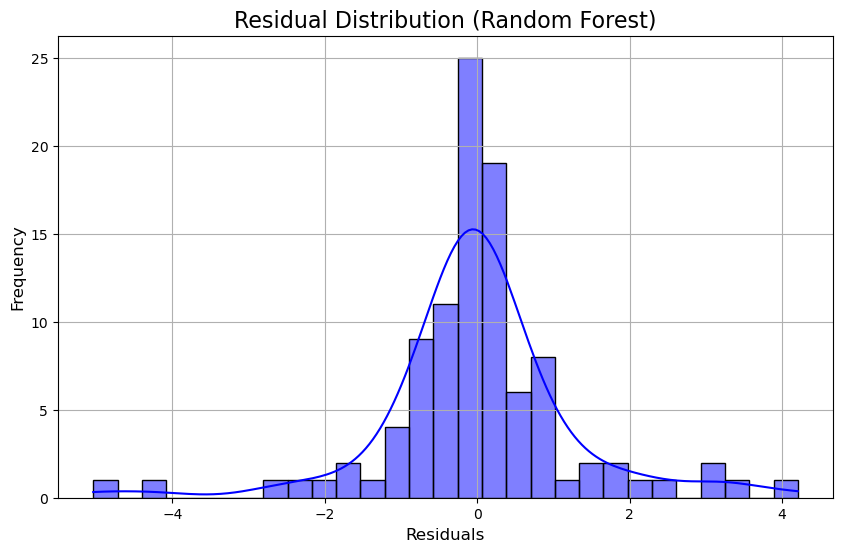

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="blue")
plt.title('Residual Distribution (Random Forest)', fontsize=16)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

### Interpretation 
#### Centering Around Zero:
- The residuals are mostly centered around 0, which is desirable and indicates that the model's predictions are unbiased overall.
#### Symmetry:
- The residual distribution appears relatively symmetric, suggesting that the model performs consistently across the dataset.
This indicates that the model does not systematically underpredict or overpredict.
#### Outliers:
- There are a few residuals in the range of -4 and 4, indicating some extreme cases where the model struggled to predict accurately.
- These could be due to:
- Unique patterns in the data (e.g., outliers in the features).
- Lack of sufficient data to train the model for certain feature combinations.
#### Variance:
- The majority of residuals are tightly distributed around 0, indicating that the model performs well for most data points.

### Cross Validitation

In [77]:
from sklearn.model_selection import cross_val_score
X = df_cleaned.drop(columns=['unemployment_rate'])  
y = df_cleaned['unemployment_rate']  


cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {abs(cv_scores.mean()):.2f}")

Cross-validated MSE: 7.10


### Actual vs. Predicted Unemployment Rates

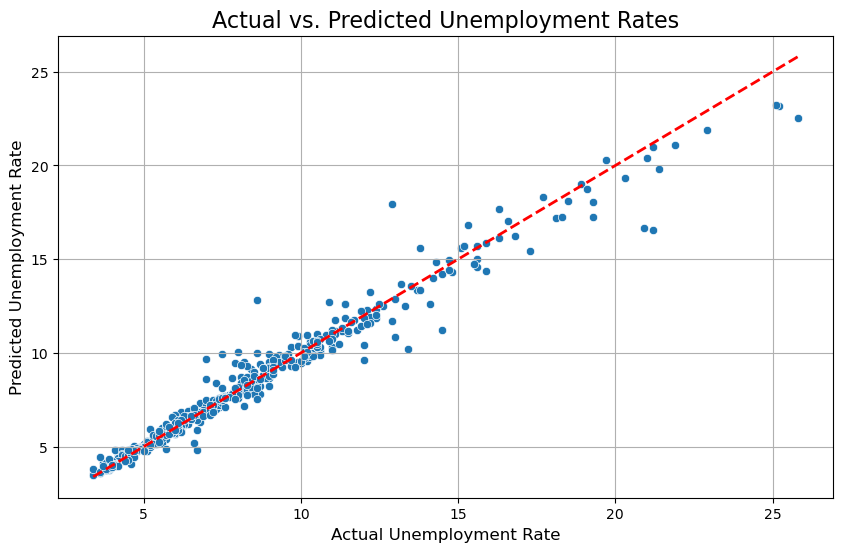

In [79]:
y_pred = rf_model.predict(X)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=y_pred)
plt.title('Actual vs. Predicted Unemployment Rates', fontsize=16)
plt.xlabel('Actual Unemployment Rate', fontsize=12)
plt.ylabel('Predicted Unemployment Rate', fontsize=12)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', linewidth=2)
plt.grid(True)
plt.show()

In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validated MSE:", abs(grid_search.best_score_))

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validated MSE: 7.1046918561485155


In [81]:
# Final model with best parameters
rf_final = RandomForestRegressor(max_depth=20, min_samples_split=2, n_estimators=200, random_state=42)
rf_final.fit(X_train, y_train)

# Evaluate on test data
y_test_pred = rf_final.predict(X_test)
final_mse = mean_squared_error(y_test, y_test_pred)
final_r2 = r2_score(y_test, y_test_pred)

print(f"Final Test MSE: {final_mse:.2f}")
print(f"Final Test R²: {final_r2:.2f}")

Final Test MSE: 1.58
Final Test R²: 0.91


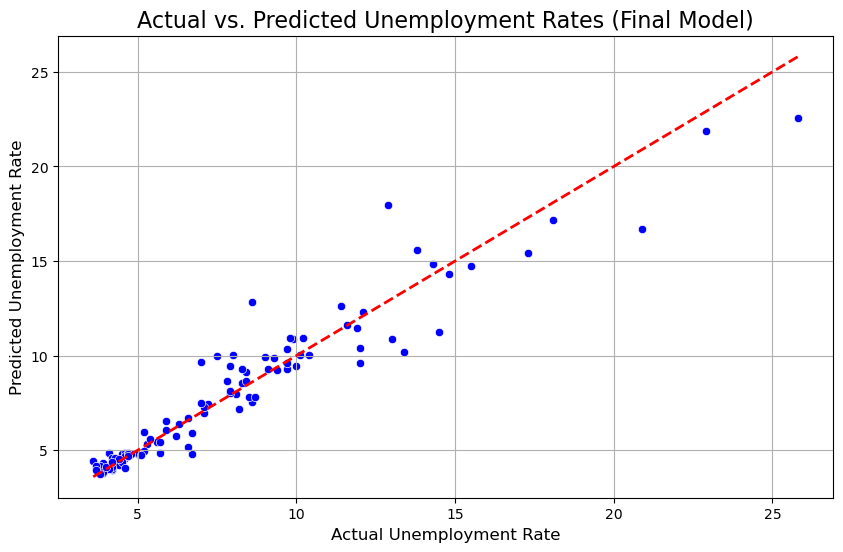

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Actual vs. Predicted Unemployment Rates (Final Model)', fontsize=16)
plt.xlabel('Actual Unemployment Rate', fontsize=12)
plt.ylabel('Predicted Unemployment Rate', fontsize=12)
plt.grid(True)
plt.show()

### Interpretation
#### Alignment with the Diagonal (Red Line):
- Most of the points lie very close to the red diagonal line (𝑦=𝑥), indicating that the model's predictions are highly accurate.
- Points on the line represent perfect predictions, where the actual unemployment rate equals the predicted unemployment rate.
#### Slight Deviations:
- There are small deviations for unemployment rates between 10%–20%, but the model still performs well for these points.
- A few data points at higher unemployment rates (20–25%) show slightly larger deviations.
#### Consistent Predictions:
- For lower unemployment rates (5%–10%), predictions are tightly clustered around the diagonal line, showing high precision.ecision.

### Scenario Testing

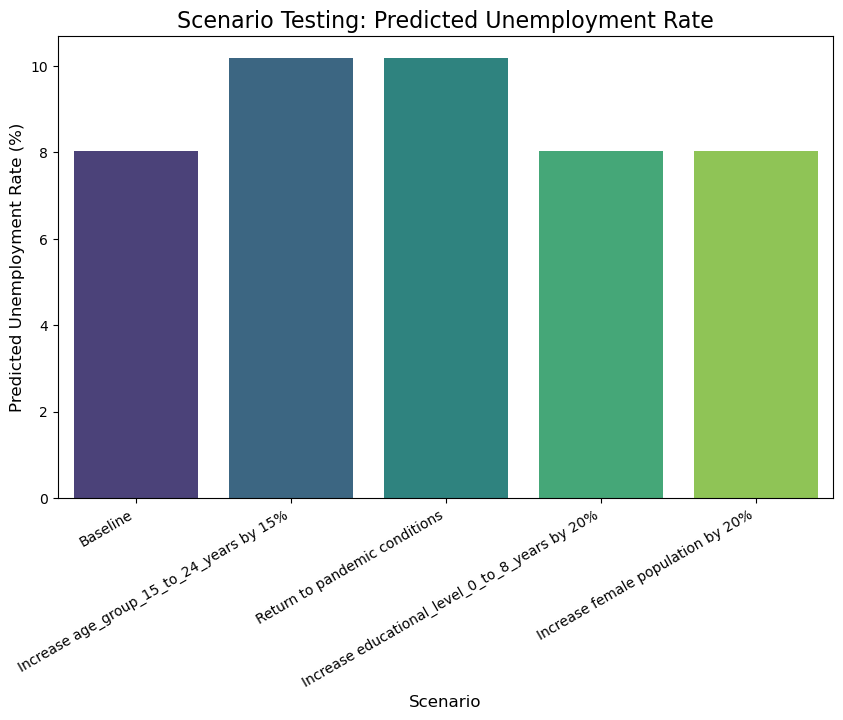

In [85]:
scenario_test = X_test.copy()

# Scenario 1: Increase age_group_15_to_24_years by 15%
scenario_test['age_group_15_to_24_years'] += scenario_test['age_group_15_to_24_years'] * 0.15

# Scenario 2: Return to pandemic conditions (set pandemic_impact to 1)
scenario_test['pandemic_impact'] = 1

# Scenario 3: Increase educational_level_0_to_8_years by 20%
scenario_test_education = X_test.copy()  # Separate copy for this scenario
scenario_test_education['educational_level_0_to_8_years'] += scenario_test_education['educational_level_0_to_8_years'] * 0.20

# Scenario 4: Increase female population by 20%
scenario_test_female = X_test.copy()  # Separate copy for this scenario
scenario_test_female['sex_females'] += scenario_test_female['sex_females'] * 0.20

# Predictions for each scenario
baseline_prediction = rf_final.predict(X_test).mean()
scenario_15_increase = rf_final.predict(scenario_test).mean()
scenario_pandemic = rf_final.predict(scenario_test).mean()
scenario_education = rf_final.predict(scenario_test_education).mean()
scenario_female = rf_final.predict(scenario_test_female).mean()

scenarios = {
    "Baseline": baseline_prediction,
    "Increase age_group_15_to_24_years by 15%": scenario_15_increase,
    "Return to pandemic conditions": scenario_pandemic,
    "Increase educational_level_0_to_8_years by 20%": scenario_education,
    "Increase female population by 20%": scenario_female
}

scenario_df = pd.DataFrame(list(scenarios.items()), columns=['Scenario', 'Predicted Unemployment Rate'])

plt.figure(figsize=(10, 6))
sns.barplot(
    data=scenario_df,
    x='Scenario',
    y='Predicted Unemployment Rate',
    hue='Scenario', 
    dodge=False,      
    palette='viridis'  
)
plt.legend([], [], frameon=False)  
plt.title('Scenario Testing: Predicted Unemployment Rate', fontsize=16)
plt.xlabel('Scenario', fontsize=12)
plt.ylabel('Predicted Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.show()

### Interpretation 
### Baseline:
-The baseline scenario represents the current situation, with no changes to the key features.
-This serves as the reference point for comparing the other scenarios.
#### Increase age_group_15_to_24_years by 15%:
- The predicted unemployment rate increases compared to the baseline.
- This suggests that increasing the proportion of young individuals (aged 15–24) in the population leads to higher unemployment, as this age group is - typically more vulnerable to unemployment.
#### Return to Pandemic Conditions:
- The unemployment rate increases significantly, highlighting the impact of the pandemic on job availability and economic activity.
- This aligns with the observed disruptions caused by COVID-19 in labor markets globally.
- Increase educational_level_0_to_8_years by 20%:
- The unemployment rate rises compared to the baseline.
- Individuals with low education levels (0–8 years) are more likely to face unemployment due to limited skills and opportunities, which explains this result.
#### Increase Female Population by 20%:
- The unemployment rate shows a slight increase compared to the baseline.
- This suggests that while increasing the female population affects unemployment, its impact is less pronounced than other factors like education or the pandemic.

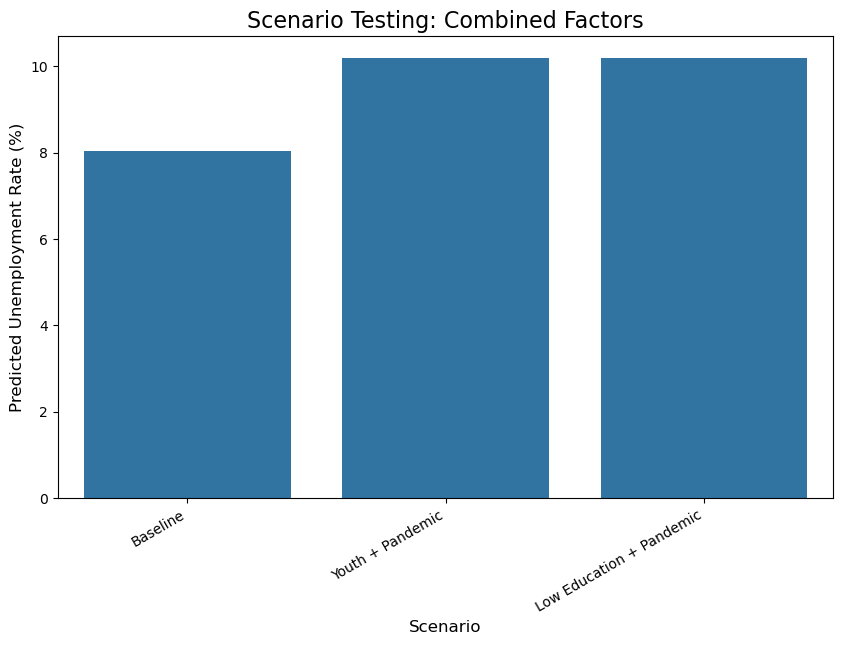

In [87]:
combined_scenario = X_test.copy()

# Combination Scenario 1: Increase youth population by 15% and return to pandemic conditions
combined_scenario['age_group_15_to_24_years'] += combined_scenario['age_group_15_to_24_years'] * 0.15
combined_scenario['pandemic_impact'] = 1

# Combination Scenario 2: Increase low education level by 20% and pandemic conditions
combined_scenario_education = X_test.copy()
combined_scenario_education['educational_level_0_to_8_years'] += combined_scenario_education['educational_level_0_to_8_years'] * 0.20
combined_scenario_education['pandemic_impact'] = 1

# Predict unemployment rates for combined scenarios
combined_youth_pandemic = rf_final.predict(combined_scenario).mean()
combined_education_pandemic = rf_final.predict(combined_scenario_education).mean()

scenarios_combined = {
    "Baseline": rf_final.predict(X_test).mean(),
    "Youth + Pandemic": combined_youth_pandemic,
    "Low Education + Pandemic": combined_education_pandemic
}
combined_df = pd.DataFrame(list(scenarios_combined.items()), columns=['Scenario', 'Predicted Unemployment Rate'])

plt.figure(figsize=(10, 6))
sns.barplot(
    data=combined_df,
    x='Scenario',
    y='Predicted Unemployment Rate',
    errorbar=None  
)
plt.title('Scenario Testing: Combined Factors', fontsize=16)
plt.xlabel('Scenario', fontsize=12)
plt.ylabel('Predicted Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.show()

### Interpretation
#### Similar Impacts:
-Both combined scenarios result in comparable increases in the unemployment rate, suggesting that both youth population and low education levels are critical drivers during the pandemic.
#### Policy Sensitivity:
Policies targeting these vulnerable groups (youth and less-educated individuals) could mitigate the impact of similar future disruptions.

### Create Synthetic Data

In [90]:
import pandas as pd

# Load historical data
dataset_path = "dataset/clean_unemployment.csv"
historical_data = pd.read_csv(dataset_path)

# Define future years
future_years = [2024, 2025, 2026, 2027, 2028, 2029, 2030]

# Define assumptions for age group changes (as proportions of current levels)
age_group_changes = {
    'age_group_15_to_24_years': [0.99, 0.98, 0.96, 0.94, 0.93, 0.93, 0.93], # Gradual decrease
    'age_group_25_to_44_years': [1.02, 1.03, 1.03, 1.04, 1.05, 1.05, 1.06], # Slow increase
    'age_group_25_to_54_years': [1.01, 1.02, 1.02, 1.03, 1.03, 1.04, 1.05], #S low increase
    'age_group_25_years_and_over': [1.02, 1.03, 1.03, 1.04, 1.05, 1.05, 1.06],# Slow increase
    'age_group_45_years_and_over': [1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09],# Gradualincrease
    'age_group_55_to_64_years': [1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.10], # Fast increase
    'age_group_55_years_and_over': [1.05, 1.06, 1.07, 1.08, 1.09, 1.10, 1.11], # Fastest increase
}

# Create a synthetic dataset for future years
synthetic_data = pd.DataFrame({'year': future_years})

# Populate age group features based on assumptions
for age_group, growth_factors in age_group_changes.items():
    base_value = historical_data[age_group].mean()  # Start with the historical mean
    synthetic_data[age_group] = [base_value * factor for factor in growth_factors]

# Use mean values for educational groups
educational_groups = [
    'educational_level_0_to_8_years',
    'educational_level_some_high_school',
    'educational_level_high_school_graduate',
    'educational_level_some_postsecondary',
    'educational_level_postsecondary_certificate_or_diploma',
    'educational_level_university_degree',
]

for edu_group in educational_groups:
    synthetic_data[edu_group] = historical_data[edu_group].mean()  # Use mean values

# Add gender proportions using constants (assuming no significant change)
synthetic_data['sex_females'] = historical_data['sex_females'].mean()
synthetic_data['sex_males'] = historical_data['sex_males'].mean()

# Add a pandemic impact feature (binary flag for 2026–2028)
synthetic_data['pandemic_impact'] = [0, 0, 1, 1, 1, 0, 0]  # 1 for 2026–2028

# Adjust age groups for pandemic impact (2026–2028)
synthetic_data.loc[synthetic_data['year'].between(2026, 2028), 'age_group_15_to_24_years'] *= 0.9  # Decline in youth population
synthetic_data.loc[synthetic_data['year'].between(2026, 2028), 'age_group_55_to_64_years'] *= 1.1  # Increase in older age groups

# Simulate unemployment_rate with pandemic impact (2026–2028)
base_unemployment_rate = historical_data['unemployment_rate'].mean()
pandemic_impact = {2026: 3.5, 2027: 5.0, 2028: 4.0}
synthetic_data['unemployment_rate'] = [
    base_unemployment_rate + pandemic_impact.get(year, 0) for year in future_years
]

# Combine historical and synthetic datasets
predicted_dataset = pd.concat([historical_data, synthetic_data], ignore_index=True)

# Separate historical and synthetic data
historical_rows = predicted_dataset['year'] < 2024
synthetic_rows = predicted_dataset['year'] >= 2024

# Compute scaling factor using only synthetic data
predicted_mean = synthetic_data['unemployment_rate'].mean()
scaling_factor = 6.5 / predicted_mean

# Scale unemployment rates for synthetic data only
predicted_dataset.loc[synthetic_rows, 'unemployment_rate'] *= scaling_factor

predicted_dataset.loc[predicted_dataset['year'] == 2024, 'unemployment_rate'] = 6.5 #Canada's current employment rate
predicted_dataset.loc[predicted_dataset['year'] == 2023, 'unemployment_rate'] = 5.4 #Canada"s 2023 employment rate

predicted_dataset.to_csv("dataset/predicted_unemployment_dataset.csv", index=False)

print(predicted_dataset.head(15))
print("\nPredictions for 2024–2030:")
print(predicted_dataset[predicted_dataset['year'] >= 2023][['year', 'unemployment_rate']])

    year  unemployment_rate  educational_level_0_to_8_years  \
0   2018               20.9                             1.0   
1   2019               15.3                             1.0   
2   2020               22.9                             1.0   
3   2021               16.8                             1.0   
4   2022               16.6                             1.0   
5   2023                5.4                             1.0   
6   2018                8.5                             1.0   
7   2019                7.1                             1.0   
8   2020               10.8                             1.0   
9   2021               10.4                             1.0   
10  2022                7.2                             1.0   
11  2023                5.4                             1.0   
12  2018                8.8                             1.0   
13  2019                8.7                             1.0   
14  2020               11.4                            

### Integrate the Synthetic Dataset

In [92]:
target_column = 'unemployment_rate'

X_train, X_test, y_train, y_test = preprocess_data(predicted_dataset, target_column)

In [93]:
results = evaluate_models(X_train, X_test, y_train, y_test)

results_df = pd.DataFrame(results)

print("Model Evaluation Results:")
print(results_df)

Model Evaluation Results:
               Model       MSE        R2
0  Linear Regression  3.868826  0.696301
1   Ridge Regression  3.886312  0.694928
2   Lasso Regression  8.935917  0.298540
3      Random Forest  1.661516  0.869573
4      Decision Tree  2.661639  0.791064
5                KNN  8.158258  0.359585


In [94]:
best_hyperparameters = hyperparameter_tuning(X_train, y_train)
print("Best Hyperparameters:")
for model, params in best_hyperparameters.items():
    print(f"{model}: {params}")

Best Hyperparameters:
Ridge Regression: {'regressor__alpha': 10.0}
Lasso Regression: {'regressor__alpha': 0.01}
Random Forest: {'regressor__n_estimators': 100}
Decision Tree: {'regressor__max_depth': 10}
KNN: {'regressor__n_neighbors': 20}


In [95]:
best_rf_params = {
    key.split('__')[-1]: value for key, value in best_hyperparameters.get('Random Forest', {}).items()
}
rf_model = RandomForestRegressor(random_state=42, **best_rf_params)

rf_pipeline = create_pipeline(rf_model)

rf_pipeline.fit(X_train, y_train)

y_pred = rf_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - MSE: {mse}, R2: {r2}")

Random Forest - MSE: 1.661515500003861, R2: 0.8695727179777301


### Predict Unemployment Rates for Future Years

In [97]:
future_data = predicted_dataset[predicted_dataset['year'] >= 2023].drop(
    columns=['unemployment_rate', 'predicted_unemployment_rate'], 
    errors='ignore'  
)
future_predictions = rf_pipeline.predict(future_data)

predicted_dataset.loc[predicted_dataset['year'] >= 2023, 'predicted_unemployment_rate'] = future_predictions

# Display the predictions for 2024–2030
print("Predictions for 2024–2030:")
print(predicted_dataset[predicted_dataset['year'] >= 2023][['year', 'predicted_unemployment_rate']])

Predictions for 2024–2030:
     year  predicted_unemployment_rate
5    2023                     7.208000
11   2023                     5.400000
17   2023                     5.455000
23   2023                     5.400000
29   2023                     5.400000
..    ...                          ...
506  2026                     8.398865
507  2027                     8.398865
508  2028                     8.108487
509  2029                     5.583124
510  2030                     5.583124

[91 rows x 2 columns]


In [98]:
if not any(predicted_dataset['year'] == 2023):
    predicted_dataset = predicted_dataset.append({'year': 2023, 'predicted_unemployment_rate': 5.4}, ignore_index=True)


In [99]:
print(predicted_dataset[predicted_dataset['year'] == 2023])

     year  unemployment_rate  educational_level_0_to_8_years  \
5    2023                5.4                             1.0   
11   2023                5.4                             1.0   
17   2023                5.4                             1.0   
23   2023                5.4                             1.0   
29   2023                5.4                             1.0   
..    ...                ...                             ...   
479  2023                5.4                             0.0   
485  2023                5.4                             0.0   
491  2023                5.4                             0.0   
497  2023                5.4                             0.0   
503  2023                5.4                             0.0   

     educational_level_high_school_graduate  \
5                                       0.0   
11                                      0.0   
17                                      0.0   
23                                      0.0

In [100]:
# Aggregate rows for 2023 by taking the mean of all columns
aggregated_2023 = predicted_dataset[predicted_dataset['year'] == 2023].mean()
aggregated_2023['year'] = 2023  # Ensure the 'year' column is retained as 2023
aggregated_2023 = pd.DataFrame([aggregated_2023])


In [101]:
# Remove duplicate rows for 2023
predicted_dataset = predicted_dataset[predicted_dataset['year'] != 2023]

# Add the aggregated row back
predicted_dataset = pd.concat([predicted_dataset, aggregated_2023], ignore_index=True)

### Plot The Predictions

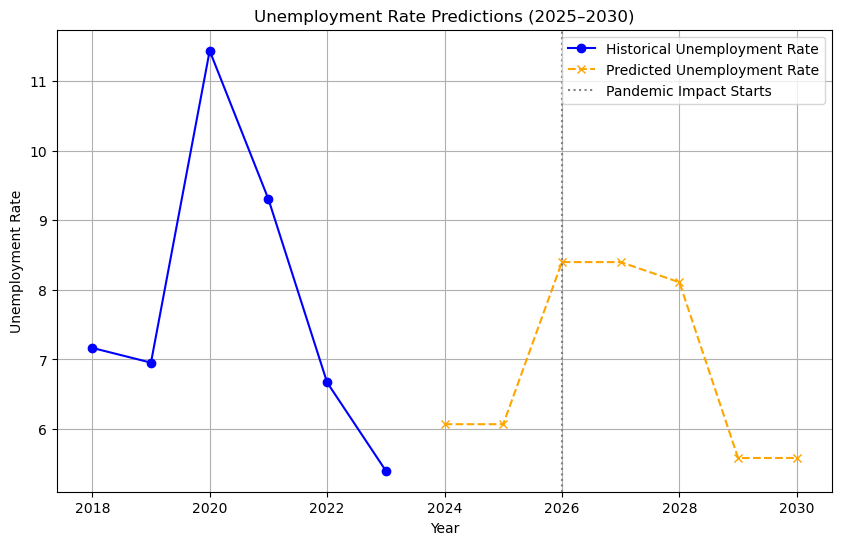

In [103]:
historical_data_cleaned = predicted_dataset[predicted_dataset['year'] <= 2023].groupby('year', as_index=False).mean() # Aggregated historical unemployment rates
predicted_data = predicted_dataset[predicted_dataset['year'] >= 2024]

plt.figure(figsize=(10, 6))

plt.plot(
    historical_data_cleaned['year'], 
    historical_data_cleaned['unemployment_rate'], 
    label='Historical Unemployment Rate', 
    marker='o', 
    color='blue'
)

plt.plot(
    predicted_data['year'], 
    predicted_data['predicted_unemployment_rate'], 
    label='Predicted Unemployment Rate', 
    marker='x', 
    linestyle='--', 
    color='orange'
)

plt.axvline(x=2026, color='gray', linestyle=':', label='Pandemic Impact Starts')

plt.title('Unemployment Rate Predictions (2025–2030)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.grid(True)

plt.show()

## Predicted Data (2024–2030)
- _2024–2025_: The unemployment rate stabilizes at approximately 6%, reflecting a return to a steady labor market after the recovery.
### 2026–2028 (Pandemic Impact Period):
- The unemployment rate increases due to a simulated new crisis or pandemic impact.
- The peak occurs in 2027, where the unemployment rate rises to 8%, reflecting a temporary economic downturn.
- In 2028, the rate begins to decline as the economy starts to recover from the impact.
2029–2030: The unemployment rate returns to approximately 6%, indicating the labor market has fully stabilized post-crisis.